In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
df.set_index('date', inplace = True)
print(df.head())


# Clean data
# Filter out upper and lower 2.5th percentile 
df = df[(df['value'] >= df['value'].quantile(0.025)) 
    & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    
    # Figure created
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plotting data
    ax.plot(df.index, df['value'], color='red')
    
    # Configuring Axes and Labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.grid(True)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    # Create new columns of just year and month
    df['year'] = df.index.year # If wasn't index, would need df['date'].dt.year
    df['month'] = df.index.month # If wasn't index, would need df['date'].dt.month
    
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    # this groups all the rows into their years, and within the years into months
    # then for each year,month group calculates the value mean.

    df_bar = df_bar.unstack() 
    # converts into a DataFrame rather than Series with multiple columns
    
    print(df_bar.head())
    
    # Draw bar plot
    # Using pandas.DataFrame.plot
    
    fig = df_bar.plot.bar(legend=True, figsize=(10,5), ylabel='Average Page Views',
                         xlabel='Years').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December'])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)



    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    # Sorts date order from Jan to Dec
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


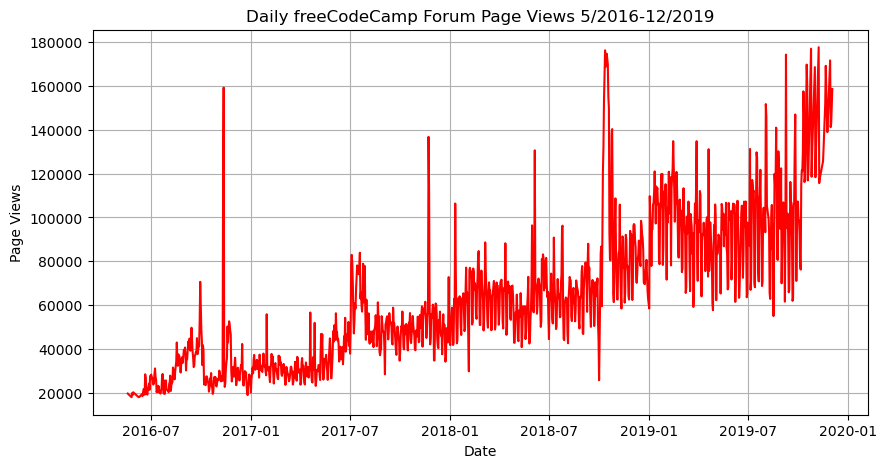

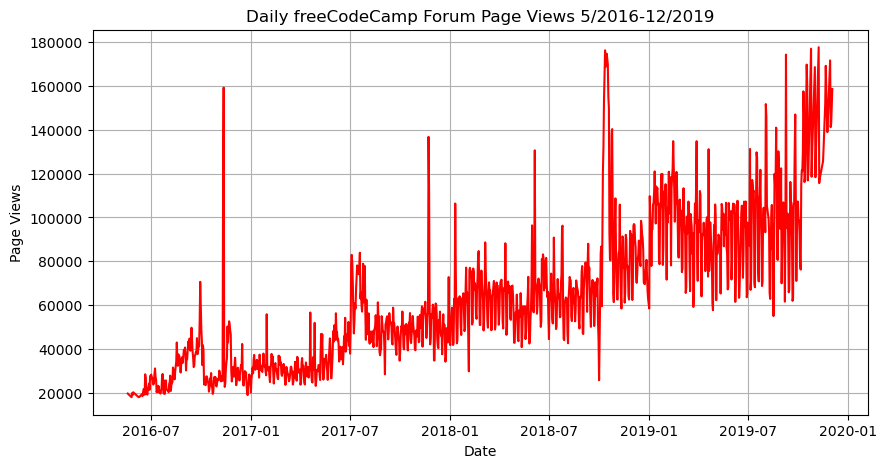

In [32]:
draw_line_plot()

month             1              2             3             4             5   \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month            6             7              8             9              10  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month             11      

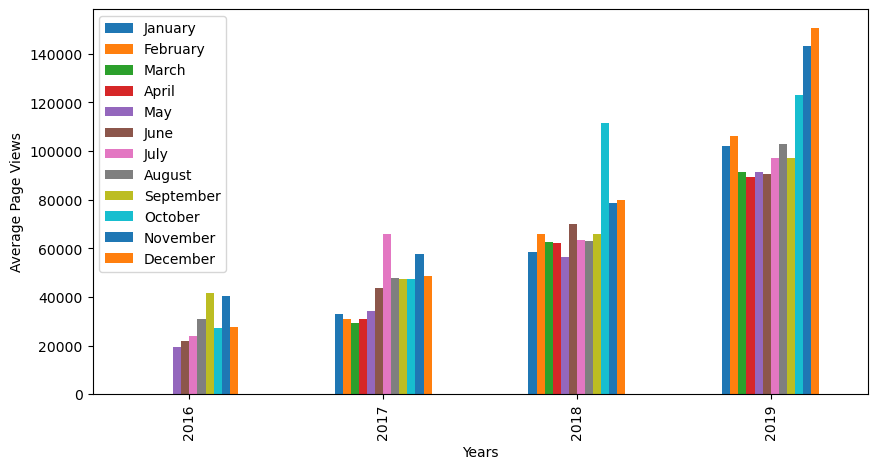

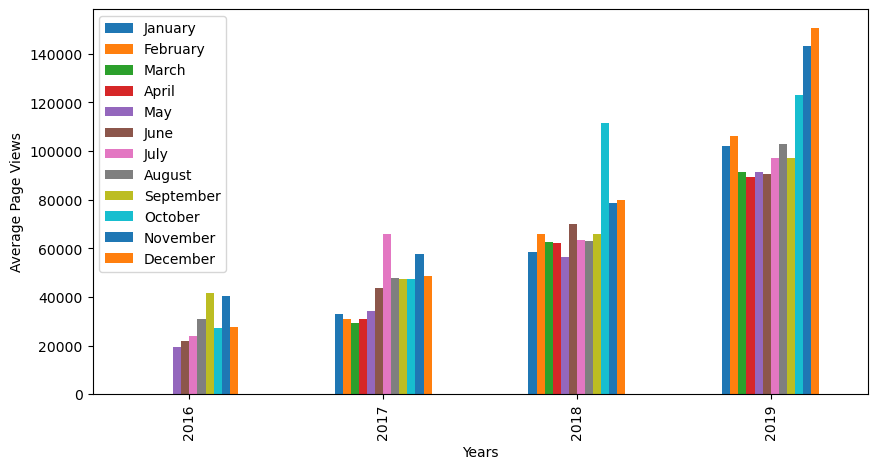

In [34]:
draw_bar_plot()

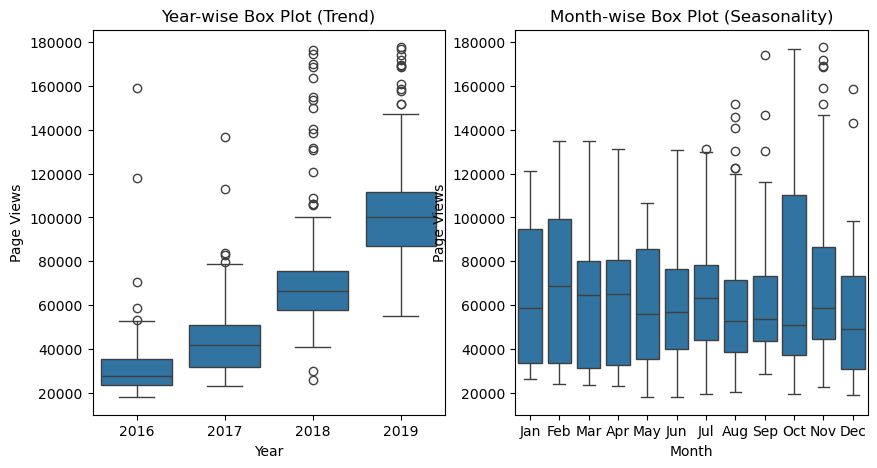

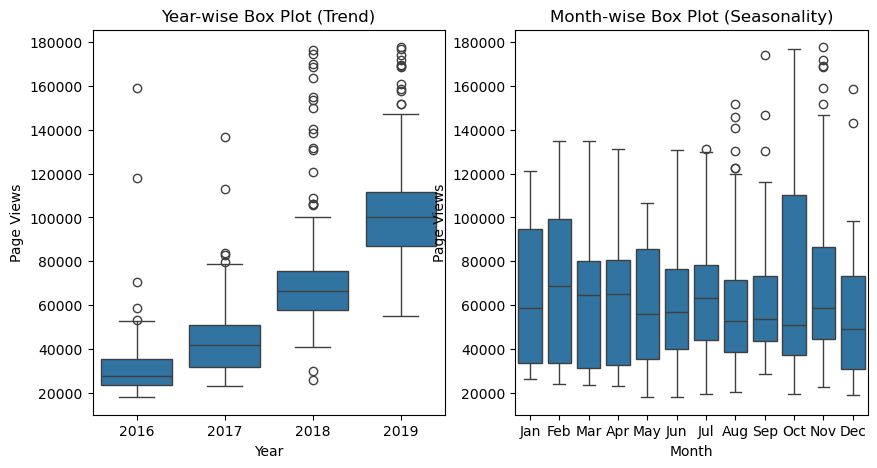

In [36]:
draw_box_plot()